# COHORT ANALİZİ

#### ** Kohort analizi fikri, kullanıcıları belirli kriterlere göre gruplara ayırmak ve bu grupların davranışlarının zaman içinde nasıl değiştiğini incelemektir. Kohort analizi, pazarlama çabalarınızın temel performans göstergelerini (dönüşüm, elde tutma oranları, yatırım getirisi vb.) nasıl etkilediğini anlamanıza yardımcı olur.

#### Müşterileri gruplandırıp grupları birbirine göre ve kendi içinde incelememize yardımcı olmaktadır



#### Bu çalışmada da "online retail" veri seti üzerinde kohort analizi ypmaya çalışcağaım

#### Online retail veir seti satış verilerini barıdndırmaktadır. Her bir gözlem ürün bazında bilgi içermektedir. Yani bir gözlem alınan bir ürünün hangi kişi tarafından  ve kişinin hangi alışverişi olduğunu ifade eden fatura numaraları ve tarihlerini vb. bilgileri  barındırmaktadır.

* **InvoiceNo:** Satılan ürünü içeren faturanın numarasını ifade etmektedir.
* **StockCode:** Her bir ürünün numarasını ifade etmektedir.
* **Description:** Ürünlerin Tanımı
* **Quantity:** ilgili alınan ürünün ne kadar alındığını ifade eder
* **InvoiceDate:** Ne zaman alındığını, fatura tarihini ifade eder
* **UnitPrice:** İlgili alınan ürünün hangi fiyattan alındığını ifade eder
* **CustomerID:** İlgili ürünü alan müşterinin numarasıdır (ID)
* **Country:** İlgili ürünü alan müşterinin Ülkesi

In [122]:
pd.pandas.set_option('display.max_row', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 170)

## Kütüpheneler ve Verinin Okunması-İncelenmesi

In [87]:
#### Temel dataframe işlemleri ve matematik işlemleri
import numpy as np
import pandas as pd

#### Görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt
from operator import attrgetter
import matplotlib.colors as mcolors

#### Diğerleri
pd.set_option('display.max_rows', 10)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from operator import attrgetter

In [3]:
### Veri Setinin Okunması
df_ = pd.read_excel('online_retail.xlsx',
                   dtype={'CustomerID': str,
                          'InvoiceID': str},
                   parse_dates=['InvoiceDate'])
df = df_.copy()

### Veriyi biraz inceleyelim

In [222]:
df = df_.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850,United Kingdom


In [225]:
df.shape

(541909, 8)

#### Kaç Eşsiz Müşteri ve Kaç farklı alışveriş olmuş bakalım

In [219]:
print(f"Eşsiz Müşteri sayısı :",df["CustomerID"].nunique())
print(f"Alışveriş sayısı:",df["InvoiceNo"].nunique())
print(f"Eşsiz Ürün sayısı:",df["StockCode"].nunique())


Eşsiz Müşteri sayısı : 4372
Alışveriş sayısı: 25900
Eşsiz Ürün sayısı: 4070


## 1. Retention Matrisinin Oluşturulması

**Retention matrisi ile her bir ayda gelen müşteri gruplarının hepsinin aynı zaman peryodları açısından veya da kendi özelinde sonraki periyotlarıdaki gelme durumlarını incelemeye yönelik bilgileri ortaya koyar**

### Adım 1:Herbir müşteri için eşsiz fatura sayısının bleirlenmesi. Müşterilerin her birinin ne kaç defa alışveriş yaprığını bulmaya çalışıyoruz.

In [145]:
n_invoice= df.groupby("CustomerID")["InvoiceNo"].nunique()
n_invoice

CustomerID
12346     2
12347     7
12348     4
12349     1
12350     1
         ..
18280     1
18281     1
18282     3
18283    16
18287     3
Name: InvoiceNo, Length: 4372, dtype: int64

### Adım2: Tüm veri setinde bir kereden fazla alışveriş yapan müşteri oranı.

In [158]:
rate = sum(n_invoice>1)/df['CustomerID'].nunique()
print(f"Müşterilerin %{float(rate*100)}'i 1 defadan fazla alışveriş yapmıştır. Bu da {sum(n_invoice>1)} adet müşteriyi ifade etmektedir")

Müşterilerin %69.967978042086'i 1 defadan fazla alışveriş yapmıştır. Bu da 3059 adet müşteriyi ifade etmektedir


### Adım3: Sipariş aylarının yakalanması.

In [159]:
df['order_month'] = df['InvoiceDate'].dt.to_period('M')

In [160]:
df["order_month"]

0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
541904    2011-12
541905    2011-12
541906    2011-12
541907    2011-12
541908    2011-12
Name: order_month, Length: 541909, dtype: period[M]

### Adım4: Cohort değişkeninin oluşturulması.

* Müşterilerin ilk saın alma tarihlerini tutmaya çalışıyoruz

In [161]:
# her bir müşterinin ilk alışveriş yaptığı tarihi tutmaya çalıştım
df['cohort'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')

In [162]:
# Tarahi ay-yıl formatına çevirdim
df["cohort"]=df["cohort"].dt.to_period('M')
df["cohort"]

0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
541904    2011-08
541905    2011-08
541906    2011-08
541907    2011-08
541908    2011-08
Name: cohort, Length: 541909, dtype: period[M]

### Adım5: Aylık müşteri sayılarının çıkarılması.

* Aylara göre kaç tekil yen  müşteri geldiğini  tutmaya çalışyıyorum.

In [173]:
n_customer=df.groupby(["cohort"])["CustomerID"].nunique().head(13)
n_customer

cohort
2010-12    948
2011-01    421
2011-02    380
2011-03    440
2011-04    299
2011-05    279
2011-06    235
2011-07    191
2011-08    167
2011-09    298
2011-10    352
2011-11    321
2011-12     41
Freq: M, Name: CustomerID, dtype: int64

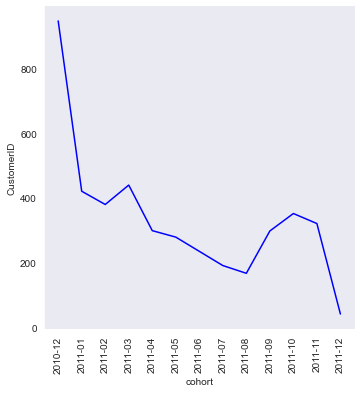

In [226]:
sns.relplot(n_customer.index.astype(str),n_customer[0:], kind="line",color="b")
plt.xticks(rotation=90);

**Cohortların aylara göre müşteri sayılarını bulmaya çalıştım. Yani  örneğin 2010-11 de gelen müşteriler hangi ayda kaç tanesi alışveriş yapmış bunu bulmaya çalıştım**

In [194]:
df_cohort=df.groupby(["cohort","order_month"]).agg(n_customers=('CustomerID', 'nunique')).reset_index(drop=False)
df_cohort.head()

,cohort,order_month,n_customers
0,2010-12,2010-12,948
1,2010-12,2011-01,362
2,2010-12,2011-02,317
3,2010-12,2011-03,367
4,2010-12,2011-04,341


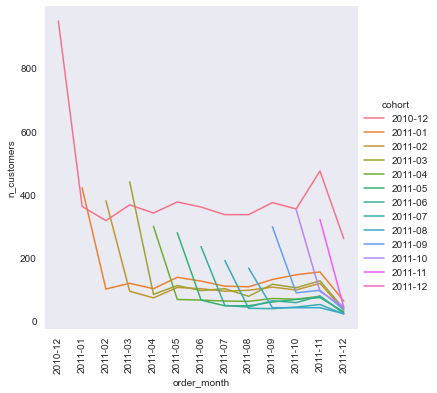

In [212]:
fig.set_size_inches(18, 10)
sns.relplot(df_cohort["order_month"].astype(str),df_cohort["n_customers"], data = df_cohort, kind="line",hue="cohort")
plt.xticks(rotation=90);

 **Grafiğe baktığımızda her ayda gelen müşterilerin alışveriş yapanlarının sayısı bir sonaraki ayda ciddi düşüş yaşamaktadır**

### Adım6: Periyod numarasının çıkarılması

* Herhangi bir ayda ilk defa  gelen müşterilerin sonraki ilgili bir ayda kaç aylık müşteri olduklarına yönelik bir hesaplama

In [214]:
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort

,cohort,order_month,n_customers,period_number
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4
...,...,...,...,...
86,2011-10,2011-11,93,1
87,2011-10,2011-12,46,2
88,2011-11,2011-11,321,0
89,2011-11,2011-12,43,1


### Adım7: Cohort pivotunun oluşturulması

In [100]:
cohort_pivot = df_cohort.pivot_table(index='cohort',
                                     columns='period_number',
                                     values='n_customers')


cohort_size = cohort_pivot.iloc[:, 0]


In [101]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09,298.0,89.0,97.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10,352.0,93.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Adım8 Retention_matrix'in oluşturulması

* **7.Adımda oluşturmuş olduğun cohort pivotunu satır bazında 1-0 arasına ölçeklendiriyorum**

In [215]:
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,1.000,0.382,0.334,0.387,0.360,0.397,0.380,0.354,0.354,0.395,0.373,0.500,0.274
2011-01,1.000,0.240,0.283,0.242,0.328,0.299,0.261,0.257,0.311,0.347,0.368,0.150,nan
2011-02,1.000,0.247,0.192,0.279,0.268,0.247,0.255,0.282,0.258,0.313,0.092,nan,nan
2011-03,1.000,0.191,0.255,0.218,0.232,0.177,0.264,0.239,0.289,0.089,nan,nan,nan
2011-04,1.000,0.227,0.221,0.211,0.207,0.237,0.231,0.261,0.084,nan,nan,nan,nan
2011-05,1.000,0.237,0.172,0.172,0.215,0.244,0.265,0.104,nan,nan,nan,nan,nan
2011-06,1.000,0.209,0.187,0.272,0.247,0.336,0.102,nan,nan,nan,nan,nan,nan
2011-07,1.000,0.209,0.204,0.230,0.272,0.115,nan,nan,nan,nan,nan,nan,nan
2011-08,1.000,0.251,0.251,0.251,0.138,nan,nan,nan,nan,nan,nan,nan,nan



## 2. Retention matrisinin ısı haritası ile görselleştirilmesi


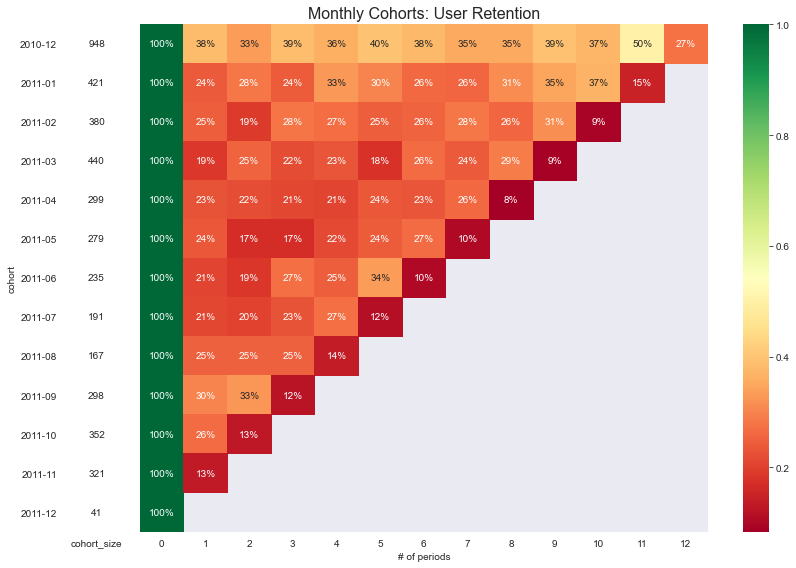

In [218]:

sns.axes_style("white")
fig, ax = plt.subplots(1, 2,
                       figsize=(12, 8),
                       sharey=True,  # y eksenini paylas
                       gridspec_kw={'width_ratios': [1, 11]}
                       # to create the grid the subplots are placed on
                       )

# retention matrix
sns.heatmap(retention_matrix,
            annot=True,
            fmt='.0%',  # grafikteki ifadelerin yüzdelik gösterimi
            cmap='RdYlGn',  # colormap
            ax=ax[1])  # subplot'taki grafikleri seçmek

ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
ax[1].set(xlabel='# of periods', ylabel='')

# cohort size
cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
white_cmap = mcolors.ListedColormap(['white'])
sns.heatmap(cohort_size_df,
            annot=True,
            cbar=False,  # ikinci grafik için cbar istemiyoruz (sağ taraftaki renkli ölçeklendirme)
            fmt='g',
            cmap=white_cmap,
            ax=ax[0])
fig.tight_layout()
plt.show()

* #### *Buradaki her bir satır  farklı bir kohortu, yani farklı bir grubu ifade etmektedir. Örneğin ilk satır 2010-11 tarihinde ilk defa gelen müşterileri, ikinci satır ise 2011-01 tarihindeki ilk defa gelen müşterileri ifade etmektedir... Son satır ise 2011-12'inci ayda ilk gelen müşterileri ifade etmektedir. Dolayısı ile bu şekilde her bir satırı farklı bir grup olarak değerlendiririz.*

* #### *Kohort analizi ile her bir grubun aynı zaman periyodundan karşılatırılmasını yapabiliriz. Örneğin Sütüun sütun bkıcak olursak, 2010-11 ayında ilke defa geeln müşterileirin 1 ay sonra ne yüzde kaçının geldiğini, aynı şekilde 2011-01 ayında ilk defa gelen müşterilerin 1 ay sonra yüzde kaçının tekrar geldiği gibi tüm grupları aynı zaman periyodundan incelemeye olanak sağlar 

* ####  Satır satır baktığımızda ise kohort  tablosu herhangi bir ayda gelen müşterinin sonraki aylarda ne oranla geldiklerini incelemeye olanak sağlar. Böylelikle 2010-12 ayında gelen müşterileirn sonraki aylarda yüzde kaçının tekrardan geldiği, yine 2011-01 ayında ilk defa gelen müşterilerin sonraki aylarda yüzde kaç oranında geldiği gibi her bir grubu kandi özelinde de inleme yapabiliriz.

* #### Dikeyden İnceleme :Örnekğin 2010-12 grubun  1 ay sonraki periyotta %38'i gelmiş. 2011-01in ise 1 ay sonraki periyotta %24'ü gelmiş ....

* #### Yataydan İnceleme: Örneğin 2010-12 Grubu bir ay sonra %38 oranında gelmiş, 2 ay sonra %33, 3 ay sorna %36 oranında gelmiş...